In [1]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display

#import plotly.plotly as py # interactive graphing
#from plotly.graph_objs import Bar, Scatter, Marker, Layout
#import plotly.tools as tls

In [22]:
data2006 = pd.read_csv('2006.csv')

In [23]:
data2006.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [24]:
print len(data2006)

7141922


In [25]:
data2006

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,6,13,0,NaN,0,0,0,0,0,0
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,4,21,0,NaN,0,0,0,20,0,0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,4,8,0,NaN,0,0,0,0,0,0
8,2006,1,11,3,1239.0,1245,1438.0,1445,US,775,...,4,12,0,NaN,0,0,0,0,0,0
9,2006,1,11,3,1642.0,1645,1841.0,1845,US,1002,...,4,10,0,NaN,0,0,0,0,0,0


In [26]:
data2006.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0
7141921,2006,12,29,5,2042.0,2045,2213.0,2235,DL,1678,...,5,15,0,NaN,0,0,0,0,0,0


In [27]:
#save small data frame
d=data2006.head()

In [28]:
#see series
d['Month']

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [29]:
#we can do operations on series
d['Month']+10000
d['DepTime']

0     743.0
1    1053.0
2    1915.0
3    1753.0
4     824.0
Name: DepTime, dtype: float64

In [30]:
d['Month']>6 #returns a boolean

0    False
1    False
2    False
3    False
4    False
Name: Month, dtype: bool

In [31]:
#but to see the data frame:
d[d['Month']>6] #we will obtain nothing because the first 5 are all january

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [32]:
#print the flight with departure > 10h
d[d['DepTime']>1000]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0


In [33]:
#flights departing from Los Angeles after 23:59h in 2006
data2006[(data2006['DepTime']>2359) & (data2006['Origin']=='LAX')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
238427,2006,1,5,4,2400.0,2359,559.0,546,UA,128,...,7,14,0,NaN,0,0,0,0,0,0
438812,2006,1,1,7,2400.0,2355,726.0,738,AA,276,...,4,18,0,NaN,0,0,0,0,0,0
657770,2006,2,17,5,2400.0,2100,108.0,2215,WN,1660,...,3,13,0,NaN,0,10,0,0,0,163
800919,2006,2,8,3,2400.0,2355,608.0,545,UA,128,...,6,17,0,NaN,0,0,0,23,0,0
1015279,2006,2,11,6,2400.0,2354,559.0,550,AA,1740,...,6,13,0,NaN,0,0,0,0,0,0
1963957,2006,4,5,3,2400.0,2355,556.0,544,UA,128,...,7,27,0,NaN,0,0,0,0,0,0
1963964,2006,4,12,3,2400.0,2355,543.0,544,UA,128,...,8,32,0,NaN,0,0,0,0,0,0
2119140,2006,4,13,4,2400.0,10,707.0,739,NW,336,...,6,20,0,NaN,0,0,0,0,0,0
2119150,2006,4,23,7,2400.0,10,707.0,739,NW,336,...,6,17,0,NaN,0,0,0,0,0,0
2159637,2006,4,3,1,2400.0,2355,735.0,740,AA,276,...,7,14,0,NaN,0,0,0,0,0,0


In [34]:
#cancelled flight in 2006
data2006[data2006['Cancelled']==1].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,0,0,1,A,0,0,0,0,0,0
52,2006,1,11,3,NaN,1945,NaN,2127,US,2049,...,0,0,1,C,0,0,0,0,0,0
70,2006,1,11,3,NaN,1900,NaN,2011,US,2141,...,0,0,1,C,0,0,0,0,0,0
74,2006,1,11,3,NaN,1630,NaN,1759,US,233,...,0,0,1,C,0,0,0,0,0,0
99,2006,1,11,3,NaN,1730,NaN,1855,US,1651,...,0,0,1,C,0,0,0,0,0,0


In [35]:
#the same in another way
data2006[data2006.CancellationCode.notnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,0,0,1,A,0,0,0,0,0,0
52,2006,1,11,3,NaN,1945,NaN,2127,US,2049,...,0,0,1,C,0,0,0,0,0,0
70,2006,1,11,3,NaN,1900,NaN,2011,US,2141,...,0,0,1,C,0,0,0,0,0,0
74,2006,1,11,3,NaN,1630,NaN,1759,US,233,...,0,0,1,C,0,0,0,0,0,0
99,2006,1,11,3,NaN,1730,NaN,1855,US,1651,...,0,0,1,C,0,0,0,0,0,0


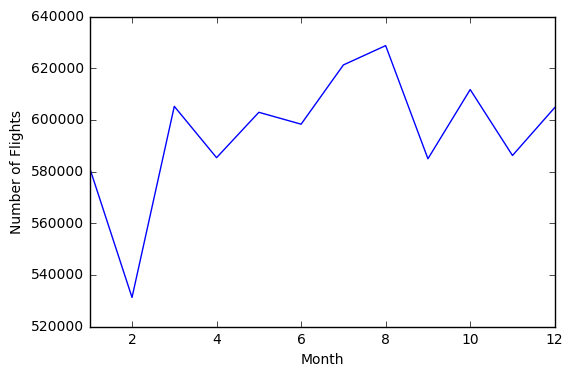

In [36]:
data2006.Month.value_counts().sort_index().plot()
plt.xlabel("Month")
plt.ylabel("Number of Flights")


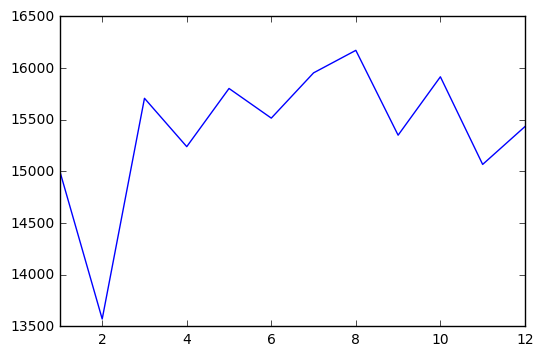

In [37]:
#ammount of flights departing from Las Vegas in 2006
lasvegas=data2006[data2006.Origin=='LAS']
lasvegas.Month.value_counts().sort_index().plot()

In [38]:
%%time
data2006[data2006.Month == 4]

Wall time: 118 ms


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1717751,2006,4,20,4,1706.0,1715,1809.0,1821,US,473,...,2,13,0,NaN,0,0,0,0,0,0
1717752,2006,4,21,5,1708.0,1715,1810.0,1821,US,473,...,3,7,0,NaN,0,0,0,0,0,0
1717753,2006,4,23,7,1709.0,1715,1811.0,1821,US,473,...,5,8,0,NaN,0,0,0,0,0,0
1717754,2006,4,24,1,1727.0,1715,1829.0,1821,US,473,...,3,11,0,NaN,0,0,0,0,0,0
1717755,2006,4,25,2,1658.0,1715,1807.0,1821,US,473,...,5,12,0,NaN,0,0,0,0,0,0
1717756,2006,4,26,3,1717.0,1715,1821.0,1821,US,473,...,3,8,0,NaN,0,0,0,0,0,0
1717757,2006,4,27,4,1702.0,1715,1805.0,1821,US,473,...,2,9,0,NaN,0,0,0,0,0,0
1717758,2006,4,28,5,1707.0,1715,1810.0,1821,US,473,...,4,8,0,NaN,0,0,0,0,0,0
1717759,2006,4,30,7,1704.0,1715,1824.0,1821,US,473,...,3,23,0,NaN,0,0,0,0,0,0
1717760,2006,4,1,6,1604.0,1555,1710.0,1709,US,474,...,1,12,0,NaN,0,0,0,0,0,0


In [ ]:
d=data2006.set_index(['Month'])
d

In [87]:
%%time
d.loc[4]

Wall time: 2 ms


,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,,,,,,,,,,,,,,,,,,,,,
4,2006,20,4,1706.0,1715,1809.0,1821,US,473,N444US,...,2,13,0,NaN,0,0,0,0,0,0
4,2006,21,5,1708.0,1715,1810.0,1821,US,473,N785AU,...,3,7,0,NaN,0,0,0,0,0,0
4,2006,23,7,1709.0,1715,1811.0,1821,US,473,N438US,...,5,8,0,NaN,0,0,0,0,0,0
4,2006,24,1,1727.0,1715,1829.0,1821,US,473,N426US,...,3,11,0,NaN,0,0,0,0,0,0
4,2006,25,2,1658.0,1715,1807.0,1821,US,473,N427US,...,5,12,0,NaN,0,0,0,0,0,0
4,2006,26,3,1717.0,1715,1821.0,1821,US,473,N421US,...,3,8,0,NaN,0,0,0,0,0,0
4,2006,27,4,1702.0,1715,1805.0,1821,US,473,N445US,...,2,9,0,NaN,0,0,0,0,0,0
4,2006,28,5,1707.0,1715,1810.0,1821,US,473,N777AU,...,4,8,0,NaN,0,0,0,0,0,0
4,2006,30,7,1704.0,1715,1824.0,1821,US,473,N417US,...,3,23,0,NaN,0,0,0,0,0,0


In [90]:
%%time
c=data2006.set_index(['Origin','Month'])
c

Wall time: 7.63 s


In [94]:
%%time
c.loc['LAS']

Wall time: 388 ms


,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,,,,,,,,,,,,,,,,,,,,,
1,2006,11,3,1556.0,1600,17.0,2357,US,64,N656AW,...,5,16,0,NaN,0,0,0,20,0,0
1,2006,11,3,1126.0,1126,1959.0,1930,US,65,N651AW,...,5,22,0,NaN,0,0,0,29,0,0
1,2006,11,3,2256.0,2257,655.0,659,US,66,N820AW,...,3,14,0,NaN,0,0,0,0,0,0
1,2006,11,3,1605.0,1612,2350.0,2343,US,776,N679AW,...,8,27,0,NaN,0,0,0,0,0,0
1,2006,11,3,1120.0,1115,1839.0,1816,US,604,N628AU,...,7,15,0,NaN,0,0,0,23,0,0
1,2006,11,3,2347.0,2345,657.0,638,US,606,N633AU,...,7,16,0,NaN,0,0,0,19,0,0
1,2006,11,3,733.0,745,1441.0,1444,US,632,N621AU,...,6,15,0,NaN,0,0,0,0,0,0
1,2006,11,3,1605.0,1611,2258.0,2304,US,748,N631AW,...,5,18,0,NaN,0,0,0,0,0,0
1,2006,11,3,2346.0,2350,711.0,716,US,49,N830AW,...,4,11,0,NaN,0,0,0,0,0,0


In [101]:
#Group by

In [102]:
LAS=data2006[data2006.Origin=='LAS']

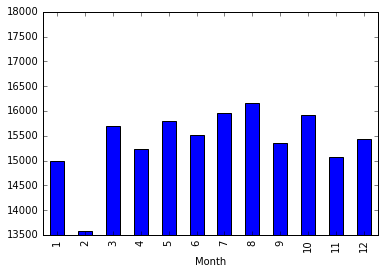

In [118]:
LAS.groupby(['Month']).size().plot(kind='bar',ylim=13500)

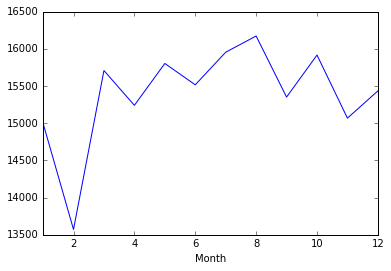

In [120]:
LAS.groupby(['Month']).size().plot()

# ------------------------------------------------SQLITE--------------------------------------------------#

In [8]:
disk_engine = create_engine('sqlite:///tuti.db') # Initializes database with filename tuti.db in current directory

In [2]:
#Initialize the list of files of flights from each year
allFiles=["1987.csv","1988.csv","1989.csv","1990.csv","1991.csv","1992.csv","1993.csv","1994.csv","1995.csv","1996.csv","1997.csv","1998.csv","1999.csv","2000.csv","2001.csv","2002.csv","2003.csv","2004.csv","2005.csv","2006.csv","2007.csv","2008.csv"]
frame_list=[]

In [10]:
%%time
#Creating the database from the csv files

start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for file_ in allFiles:
    try:
        for df in pd.read_csv(file_, chunksize=chunksize, iterator=True, encoding='utf-8'):
            df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

            df.index += index_start

            # Remove the un-interesting columns
            columns = ['Year', 'Month', 'DayOfMonth', 'CRSDepTime', 'UniqueCarrier',
                       'Origin', 'Dest', 'Cancelled']

            for c in df.columns:
                if c not in columns:
                    df = df.drop(c, axis=1)    


            j+=1
            print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

            df.to_sql('data', disk_engine, if_exists='append')
            index_start = df.index[-1] + 1
    except UnicodeDecodeError:
        continue

0 seconds: completed 20000 rows
1 seconds: completed 40000 rows
3 seconds: completed 60000 rows
5 seconds: completed 80000 rows
6 seconds: completed 100000 rows
8 seconds: completed 120000 rows
9 seconds: completed 140000 rows
11 seconds: completed 160000 rows
12 seconds: completed 180000 rows
14 seconds: completed 200000 rows
15 seconds: completed 220000 rows
17 seconds: completed 240000 rows
18 seconds: completed 260000 rows
20 seconds: completed 280000 rows
21 seconds: completed 300000 rows
22 seconds: completed 320000 rows
24 seconds: completed 340000 rows
25 seconds: completed 360000 rows
26 seconds: completed 380000 rows
28 seconds: completed 400000 rows
29 seconds: completed 420000 rows
30 seconds: completed 440000 rows
31 seconds: completed 460000 rows
33 seconds: completed 480000 rows
34 seconds: completed 500000 rows
35 seconds: completed 520000 rows
36 seconds: completed 540000 rows
38 seconds: completed 560000 rows
39 seconds: completed 580000 rows
40 seconds: completed 600

In [4]:
%%time
# Each time we want to work with the database we don't need to charge all the files again, instead we connect to it.
import sqlite3
disk_engine=sqlite3.connect('tuti.db')


Wall time: 0 ns


In [3]:
# We select the first 3 rows of the database
df = pd.read_sql_query('SELECT * FROM data LIMIT 3', disk_engine)
df.head()

,index,Year,Month,DayofMonth,CRSDepTime,UniqueCarrier,Origin,Dest
0,1,1987,10,14,730,PS,SAN,SFO
1,2,1987,10,15,730,PS,SAN,SFO
2,3,1987,10,17,730,PS,SAN,SFO


In [5]:
# We select 3 columns (DepartureTime, Origin and Destination) from the first 3 rows of the full database
df = pd.read_sql_query('SELECT CRSDepTime, Origin, Dest FROM data LIMIT 3', disk_engine)
df.head()

,CRSDepTime,Origin,Dest
0,730,SAN,SFO
1,730,SAN,SFO
2,730,SAN,SFO


In [19]:
# We select the same 3 columns for 5 of the flights which its destination was San Francisco
df = pd.read_sql_query('SELECT CRSDepTime, Origin, Dest '
                       'FROM data '
                       'WHERE Dest = "SFO" '
                       'LIMIT 20 ', disk_engine)
df.head()

,CRSDepTime,Origin,Dest
0,730,SAN,SFO
1,730,SAN,SFO
2,730,SAN,SFO
3,730,SAN,SFO
4,730,SAN,SFO


In [40]:
# We select 3 columns from 100 flights which its Origin is Los Angeles or Las Vegas and happened in the year 1988
df = pd.read_sql_query('SELECT  Year, CRSDepTime, Origin, Dest '
                       'FROM data '
                       'WHERE Origin IN ("LAX","LAS") AND Year = "1988" '
                       'LIMIT 100', disk_engine)
df

,Year,CRSDepTime,Origin,Dest
0,1988,955,LAX,SAN
1,1988,955,LAX,SAN
2,1988,955,LAX,SAN
3,1988,955,LAX,SAN
4,1988,955,LAX,SAN
5,1988,955,LAX,SAN
6,1988,955,LAX,SAN
7,1988,955,LAX,SAN
8,1988,955,LAX,SAN
9,1988,955,LAX,SAN


In [11]:
%%time
# We select the data of the year of all the flights to prove that there are flights from all the years.

df = pd.read_sql_query('SELECT DISTINCT Year FROM data', disk_engine)
df

Wall time: 6min 10s


In [12]:
df

,Year
0,1987
1,1988
2,1989
3,1990
4,1991
5,1992
6,1993
7,1994
8,1995
9,1996


In [4]:
%%time

# We count the number of flights its Origin was Las Vegas, Los Angeles or San Diego
df = pd.read_sql_query('SELECT Origin, COUNT(*) as `num_flights`'
                       'FROM data '
                       'WHERE Origin IN ("LAS","LAX","SAN") '
                       'GROUP BY Origin '
                       'ORDER BY -num_flights', disk_engine)
df.head(10)


Wall time: 1min 50s


In [5]:
# We set our credentials for being able to plot interactive graphics
tls.set_credentials_file(username='andreaque', api_key='ri2bu5e4cp')

In [6]:
py.iplot([Bar(x=df.Origin, y=df.num_flights)], filename='Number of flights depending on the Origin')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~andreaque/0 or inside your plot.ly account where it is named 'Number of flights depending on the Origin'


In [7]:
%%time
# We count the number of flights which took off from each state of America
df = pd.read_sql_query('SELECT Origin, COUNT(*) as `num_flights`'
                       'FROM data '
                       'GROUP BY Origin '
                       'ORDER BY -num_flights', disk_engine)
df.head(10)

Wall time: 4min 34s


In [15]:
df

,Origin,num_flights
0,ORD,6597334
1,ATL,6096626
2,DFW,5710865
3,LAX,4088624
4,PHX,3490953
5,DEN,3319776
6,DTW,2979123
7,IAH,2884461
8,MSP,2754938
9,SFO,2733760


In [8]:
py.iplot({'data':[Bar(x=df.Origin, y=df.num_flights)],
          'layout':{'xaxis': {'tickangle': 40}}},
         filename='Number of flights depending on the Origin')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~andreaque/0 or inside your plot.ly account where it is named 'Number of flights depending on the Origin'


The airport with the most number of flights is the one from Chicago and the airport which has the less number of flights is Charles B. Wheeler from Kansas City.

In [9]:
%%time
df = pd.read_sql_query('SELECT DISTINCT Year, COUNT(*) as `num_flights`'
                       'FROM data '
                       'GROUP BY Year '
                       'ORDER BY -num_flights', disk_engine)

Wall time: 3min 40s


In [10]:
py.iplot({'data':[Bar(x=df.Year, y=df.num_flights)],
          'layout':Layout(barmode='stack', xaxis= {'tickangle': 40})},
         filename='Number of flights depending on the Year')

In [19]:
df = pd.read_sql_query('SELECT Month, COUNT(*) as `num_flights` '
                        'FROM data '
                        'GROUP BY `Month` '
                       'COLLATE NOCASE '
                       'ORDER BY -num_flights '
                       'LIMIT 11 ', disk_engine)
df

,Month,num_flights
0,10,10758658
1,8,10646835
2,7,10571942
3,12,10559041
4,3,10448039
5,5,10330467
6,1,10272489
7,6,10226946
8,11,10218176
9,4,10081982


In [11]:
%%time
df = pd.read_sql_query('SELECT Year, SUM(Cancelled) AS cancellations '
                       'FROM data '
                       'GROUP BY Year ', disk_engine)

Wall time: 4min 15s


In [66]:
df

,Year,cancellations
0,1987,19685
1,1988,50163
2,1989,74165
3,1990,52458
4,1991,43505
5,1992,52836
6,1993,59845
7,1994,66740
8,1995,91905
9,1996,128536


In [67]:
py.iplot({'data':[Bar(x=df.Year, y=df.cancellations)],
          'layout':Layout(barmode='stack', xaxis= {'tickangle': 40}, title='Number of cancellations per Year')},
         filename='Number of cancellations per Year')

In [81]:
for i in range (0,50,10):
    df = pd.read_sql_query('SELECT * '
                           'FROM data '
                            'LIMIT 10 OFFSET %i; ' %i,  
                            disk_engine)
    print df
    


   index  Year  Month  DayofMonth  CRSDepTime UniqueCarrier Origin Dest
0      1  1987     10          14         730            PS    SAN  SFO
1      2  1987     10          15         730            PS    SAN  SFO
2      3  1987     10          17         730            PS    SAN  SFO
3      4  1987     10          18         730            PS    SAN  SFO
4      5  1987     10          19         730            PS    SAN  SFO
5      6  1987     10          21         730            PS    SAN  SFO
6      7  1987     10          22         730            PS    SAN  SFO
7      8  1987     10          23         730            PS    SAN  SFO
8      9  1987     10          24         730            PS    SAN  SFO
9     10  1987     10          25         730            PS    SAN  SFO
   index  Year  Month  DayofMonth  CRSDepTime UniqueCarrier Origin Dest
0     11  1987     10          26         730            PS    SAN  SFO
1     12  1987     10          28         725            PS    S

In [51]:
SET @foo=5;
PREPARE STMT FROM 'SELECT * '
                  'FROM data '
                  'LIMIT ? ', 
                  disk_engine';
EXECUTE STMT USING @foo;

SyntaxError: invalid syntax (<ipython-input-51-a19080051d6f>, line 1)

In [6]:
%%time
df = pd.read_sql_query('SELECT Origin, SUM(Cancelled) AS cancellations '
                       'FROM data '
                       'GROUP BY Origin '
                       'ORDER BY cancellations', disk_engine)

Wall time: 8min 52s


In [7]:
dict_origin={key:None for key in list(df.Origin)}

i=0
for key in list(df.Origin):
    dict_origin[key]= i
    i+=1
    
dict_origin

{u'ABE': 253,
 u'ABI': 132,
 u'ABQ': 280,
 u'ABY': 91,
 u'ACK': 67,
 u'ACT': 147,
 u'ACV': 171,
 u'ACY': 73,
 u'ADK': 43,
 u'ADQ': 155,
 u'AEX': 124,
 u'AGS': 201,
 u'AKN': 80,
 u'ALB': 275,
 u'ALO': 63,
 u'AMA': 229,
 u'ANC': 297,
 u'ANI': 31,
 u'APF': 61,
 u'ASE': 200,
 u'ATL': 345,
 u'ATW': 194,
 u'AUS': 299,
 u'AVL': 208,
 u'AVP': 199,
 u'AZO': 248,
 u'BDL': 303,
 u'BET': 165,
 u'BFF': 0,
 u'BFI': 1,
 u'BFL': 144,
 u'BGM': 168,
 u'BGR': 213,
 u'BHM': 272,
 u'BIL': 196,
 u'BIS': 154,
 u'BJI': 22,
 u'BLI': 75,
 u'BMI': 192,
 u'BNA': 306,
 u'BOI': 228,
 u'BOS': 341,
 u'BPT': 92,
 u'BQK': 85,
 u'BQN': 48,
 u'BRO': 97,
 u'BRW': 150,
 u'BTM': 113,
 u'BTR': 245,
 u'BTV': 247,
 u'BUF': 300,
 u'BUR': 289,
 u'BWI': 324,
 u'BZN': 184,
 u'CAE': 261,
 u'CAK': 224,
 u'CCR': 60,
 u'CDC': 52,
 u'CDV': 103,
 u'CEC': 94,
 u'CHA': 221,
 u'CHO': 131,
 u'CHS': 266,
 u'CIC': 70,
 u'CID': 269,
 u'CKB': 2,
 u'CLD': 104,
 u'CLE': 322,
 u'CLL': 134,
 u'CLT': 332,
 u'CMH': 312,
 u'CMI': 195,
 u'CMX': 45,
 u'

In [21]:
dict_origin['BFI']

1

In [8]:
%%time
dest_query = pd.read_sql_query('SELECT Dest, SUM(Cancelled) AS cancellations '
                       'FROM data '
                       'GROUP BY Dest '
                       'ORDER BY cancellations', disk_engine)

Wall time: 8min 39s


In [28]:
dict_dest={key:None for key in list(dest_query.Dest)}

i=0
for key in list(dest_query.Dest):
    dict_dest[key]= i
    i+=1
    
dict_dest

{u'ABE': 258,
 u'ABI': 132,
 u'ABQ': 284,
 u'ABY': 103,
 u'ACK': 82,
 u'ACT': 149,
 u'ACV': 163,
 u'ACY': 84,
 u'ADK': 48,
 u'ADQ': 169,
 u'AEX': 131,
 u'AGS': 210,
 u'AKN': 88,
 u'ALB': 281,
 u'ALO': 69,
 u'AMA': 237,
 u'ANC': 307,
 u'ANI': 34,
 u'APF': 67,
 u'ASE': 203,
 u'ATL': 350,
 u'ATW': 199,
 u'AUS': 303,
 u'AVL': 213,
 u'AVP': 208,
 u'AZO': 252,
 u'BDL': 308,
 u'BET': 177,
 u'BFF': 0,
 u'BFI': 16,
 u'BFL': 142,
 u'BGM': 176,
 u'BGR': 219,
 u'BHM': 278,
 u'BIL': 197,
 u'BIS': 158,
 u'BJI': 29,
 u'BLI': 93,
 u'BMI': 196,
 u'BNA': 309,
 u'BOI': 227,
 u'BOS': 346,
 u'BPT': 100,
 u'BQK': 95,
 u'BQN': 56,
 u'BRO': 104,
 u'BRW': 152,
 u'BTM': 123,
 u'BTR': 245,
 u'BTV': 251,
 u'BUF': 304,
 u'BUR': 295,
 u'BWI': 329,
 u'BZN': 183,
 u'CAE': 263,
 u'CAK': 229,
 u'CBM': 1,
 u'CCR': 65,
 u'CDC': 58,
 u'CDV': 89,
 u'CEC': 105,
 u'CHA': 228,
 u'CHO': 137,
 u'CHS': 273,
 u'CIC': 79,
 u'CID': 274,
 u'CKB': 2,
 u'CLD': 110,
 u'CLE': 328,
 u'CLL': 135,
 u'CLT': 337,
 u'CMH': 317,
 u'CMI': 202,


In [29]:
dict_dest['BFI']

16

In [48]:
print len(dict_dest)
print len(dict_origin)

352
347


In [26]:
yes=[]
for key in dict_origin.keys():
    if dict_origin[key]==dict_dest[key]:
        yes.append(1)
        #print 'Yes'
if len(yes)==len(dict_origin):
    print 'Yeah!'
        

In [22]:
%%time
carrier_query = pd.read_sql_query('SELECT UniqueCarrier, SUM(Cancelled) AS cancellations '
                       'FROM data '
                       'GROUP BY UniqueCarrier '
                       'ORDER BY cancellations', disk_engine)

Wall time: 6min 8s


In [30]:
dict_carrier={key:None for key in list(carrier_query.UniqueCarrier)}

i=0
for key in list(carrier_query.UniqueCarrier):
    dict_carrier[key]= i
    i+=1
    
dict_carrier

{u'9E': 10,
 u'AA': 26,
 u'AQ': 5,
 u'AS': 18,
 u'B6': 8,
 u'CO': 21,
 u'DH': 11,
 u'DL': 25,
 u'EA': 12,
 u'EV': 15,
 u'F9': 3,
 u'FL': 9,
 u'HA': 1,
 u'HP': 17,
 u'ML (1)': 2,
 u'MQ': 23,
 u'NW': 24,
 u'OH': 14,
 u'OO': 19,
 u'PA (1)': 6,
 u'PI': 7,
 u'PS': 0,
 u'TW': 20,
 u'TZ': 4,
 u'UA': 27,
 u'US': 28,
 u'WN': 22,
 u'XE': 16,
 u'YV': 13}

# -----------------Tests SKLEARN---------------------------

In [6]:
from sklearn import linear_model as sk
from sklearn.linear_model import SGDRegressor
from sklearn.utils import shuffle
import numpy as np

In [7]:
%%time
model = sk.SGDClassifier()
classes= np.array([0,1])
for i in range(0,100,10):
    X_train = pd.read_sql_query('SELECT Year, Month, CRSDepTime '
                            'FROM data '
                           'LIMIT 10 OFFSET %i; ' %i, disk_engine)
    
    y_train = pd.read_sql_query('SELECT Cancelled '
                           'FROM data '
                           'LIMIT 10 OFFSET %i; ' %i, disk_engine)
    
    chunk_x, chunk_y = shuffle(chunk_x, chunk_y)
    model.partial_fit(chunk_x, chunk_y.values.ravel(),classes=classes )


Wall time: 99 ms


In [9]:
print model.predict([[1987, 10, 1505]])

[0]


In [82]:
%%time
# We count the number of flights which took off from each state of America
can = pd.read_sql_query('SELECT Year, Month, CRSDepTime, Cancelled '
                       'FROM data '
                       'WHERE Year = 1987 '
                       , disk_engine)


Wall time: 2min 34s


In [83]:
can[can['Cancelled']==1]

,Year,Month,CRSDepTime,Cancelled
52,1987,10,1505,1
79,1987,10,1635,1
98,1987,10,830,1
161,1987,10,930,1
263,1987,10,2000,1
500,1987,10,1845,1
985,1987,10,1930,1
1248,1987,10,700,1
1435,1987,10,1600,1
1454,1987,10,1600,1



# VIDEO


In [84]:
train = pd.read_sql_query('SELECT * '
                       'FROM data '
                       'LIMIT 1000000 OFFSET 1000000 ', disk_engine)

In [85]:
train.head()

,index,Year,Month,CRSDepTime,UniqueCarrier,Origin,Dest,Cancelled
0,1000001,1987,12,2324,HP,MAF,LBB,0
1,1000002,1987,12,2324,HP,MAF,LBB,0
2,1000003,1987,12,2324,HP,MAF,LBB,0
3,1000004,1987,12,2324,HP,MAF,LBB,0
4,1000005,1987,12,2324,HP,MAF,LBB,0


In [86]:
feature_cols=['Year','Month','CRSDepTime']

In [87]:
X = train.loc[:,feature_cols]

In [88]:
X.shape

(1000000, 3)

In [89]:
y = train.Cancelled

In [90]:
y.shape

(1000000L,)

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
test =  pd.read_sql_query('SELECT * '
                       'FROM data '
                       'LIMIT 1000000 OFFSET 2000000 ', disk_engine)

In [93]:
test.head()

,index,Year,Month,CRSDepTime,UniqueCarrier,Origin,Dest,Cancelled
0,2000001,1988,2,1106,DL,SLC,PHX,0
1,2000002,1988,2,1106,DL,SLC,PHX,0
2,2000003,1988,2,1106,DL,SLC,PHX,0
3,2000004,1988,2,1106,DL,SLC,PHX,0
4,2000005,1988,2,1106,DL,SLC,PHX,0


In [94]:
X_new = test.loc[:,feature_cols]

In [95]:
X_new.shape

(1000000, 3)

In [107]:
new_pred_class = logreg.predict (X_new)
print new_pred_class

[0 0 0 ..., 0 0 0]


In [108]:
for pred in new_pred_class:
    if pred==1:
        print 'Yes',pred

In [98]:
pd.DataFrame({'CRSDepTime':test.CRSDepTime, 'Cancelled':new_pred_class})

,CRSDepTime,Cancelled
0,1106,0
1,1106,0
2,1106,0
3,1106,0
4,1106,0
5,1106,0
6,1106,0
7,1106,0
8,1106,0
9,1106,0


In [99]:
for pred in new_pred_class:
    if pred==1:
        print 'Yes',pred